## Running the sql query in python

In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
conn = sqlite3.connect("sales_analysis.db")

In [27]:
query = "select * from sales"
df = pd.read_sql_query(query,conn)
df.head()

,order_id,order_date,unit_price,quantity,total
0,1,2025-04-01,100.5,2,201.0
1,2,2025-04-02,50.0,3,150.0
2,3,2025-04-03,200.0,1,200.0
3,4,2025-04-04,15.5,10,155.0
4,5,2025-04-05,75.0,4,300.0


In [29]:
df.dtypes

order_id        int64
order_date     object
unit_price    float64
quantity        int64
total         float64
dtype: object

In [32]:
query1 = "SELECT SUM(quantity) AS total_qty, SUM(quantity * unit_price) AS revenue FROM sales"
pd.read_sql_query(query1,conn)

,total_qty,revenue
0,20,1006.0


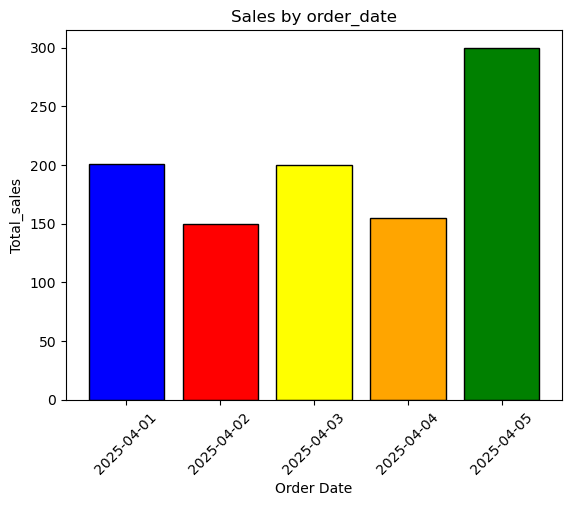

In [44]:
plt.bar(df["order_date"],df["total"],color = ['blue','red','yellow','orange','green'],edgecolor = 'black')
plt.xlabel("Order Date")
plt.ylabel("Total_sales")
plt.title("Sales by order_date")
plt.xticks(rotation = 45)
plt.show()

In [46]:
query2 = "SELECT order_id,order_date,max(total) as max_sales from sales"
pd.read_sql_query(query2,conn)

,order_id,order_date,max_sales
0,5,2025-04-05,300.0


In [47]:
query3 = "SELECT order_id,order_date,min(total) as min_sales from sales"
pd.read_sql_query(query3,conn)

,order_id,order_date,min_sales
0,2,2025-04-02,150.0


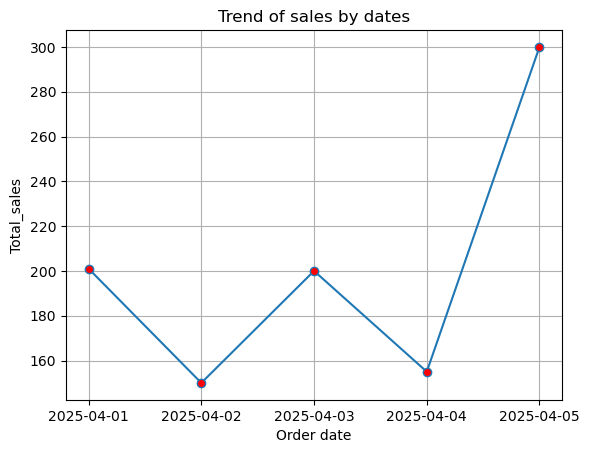

In [55]:
plt.plot(df["order_date"],df["total"],marker = "o",markerfacecolor="red",)
plt.xlabel("Order date")
plt.ylabel("Total_sales")
plt.title("Trend of sales by dates")
plt.grid()
plt.show()

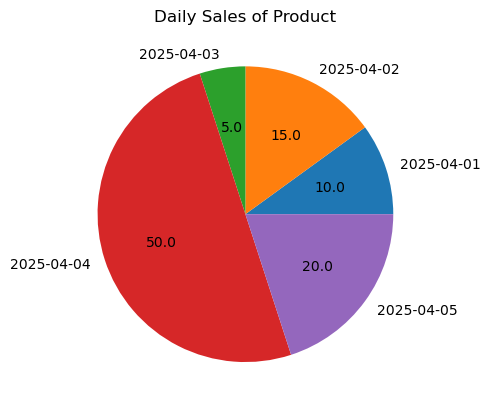

In [62]:
plt.pie(df["quantity"],labels = df["order_date"],autopct = "%1.1f")
plt.title("Daily Sales of Product")
plt.show()